<a href="https://colab.research.google.com/github/KVinayReddy7/21BDS0287-EDA/blob/main/Module6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MODULE 6(Dimensionality Reduction)**

**KATUKURI VINAY REDDY**

**21BDS0287**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Loading the dataset from the new GitHub link
url = 'https://github.com/KVinayReddy7/21BDS0287-EDA/blob/main/credit%20card.csv?raw=true'
df = pd.read_csv(url)

df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


**PCA on Numeric Columns**

In [2]:
# Replace '?' with NaN and drop non-numeric columns
df.replace('?', pd.NA, inplace=True)
df_numeric = df.drop(columns=['ID', 'ZIP Code'], errors='ignore')

# Convert all columns to numeric (forcing errors='coerce' will turn non-convertible values to NaN)
df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
df_numeric.dropna(inplace=True)

# Standardize the data (PCA works best with standardized data)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_numeric)

# Perform PCA
pca = PCA()
pca.fit(data_scaled)

# Display the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:\n", explained_variance_ratio)

Explained Variance Ratio:
 [0.18836602 0.16528828 0.1185068  0.09551364 0.08465562 0.08229679
 0.07893858 0.07687731 0.04800538 0.03647304 0.02463267 0.00044587]


**PCA Results**

In [3]:
# Eigenvalues (explained variance ratio)
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio (Eigenvalues):\n", explained_variance_ratio)

# Component loadings (coefficients of the components)
component_loadings = pca.components_
print("\nComponent Loadings (coefficients):\n", component_loadings)

Explained Variance Ratio (Eigenvalues):
 [0.18836602 0.16528828 0.1185068  0.09551364 0.08465562 0.08229679
 0.07893858 0.07687731 0.04800538 0.03647304 0.02463267 0.00044587]

Component Loadings (coefficients):
 [[-2.03216012e-01 -1.98604020e-01  5.52168240e-01 -7.69840072e-02
   4.99467673e-01 -1.02863465e-01  2.12190630e-01  4.52794073e-01
   8.50220070e-02  2.92875724e-01  4.52840381e-02  5.73727545e-02]
 [ 6.72596028e-01  6.73741190e-01  1.34934296e-01 -8.97028362e-02
   1.13172383e-01  8.13165408e-03  6.26291533e-02  1.52983128e-01
   4.78979076e-02  1.42957587e-01  4.57110055e-02  4.91181383e-02]
 [-4.51695954e-02 -5.16707208e-02 -2.32528890e-01  2.67502005e-01
  -2.30834806e-01  2.33704740e-01 -6.26417796e-02  8.64470770e-02
   4.42197653e-01  5.87569806e-01  2.53287414e-01  3.81354926e-01]
 [ 2.30112687e-02  3.56930060e-03 -2.13007437e-02  4.29347509e-01
  -3.09066734e-02  6.76482290e-01  9.79017330e-02  4.28188358e-01
  -2.11510280e-01 -1.30445869e-01 -2.09456086e-01 -2.39847

**PCA Visualization**

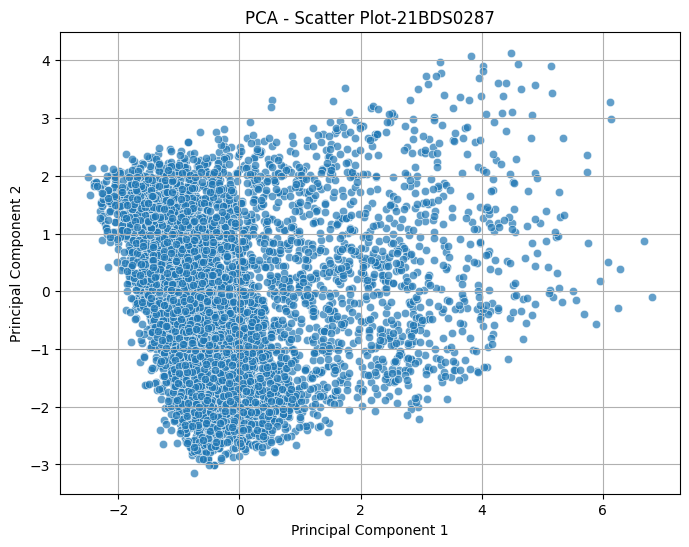

In [4]:
# Get the first two principal components
pc_df = pd.DataFrame(pca.transform(data_scaled), columns=[f"PC{i+1}" for i in range(pca.n_components_)])

# Create a scatter plot
plt.figure(figsize=(8, 6))

# Scatter plot (no hue since diagnosis is not present in credit card dataset)
sns.scatterplot(x=pc_df['PC1'], y=pc_df['PC2'], alpha=0.7)

# Add titles and labels
plt.title('PCA - Scatter Plot-21BDS0287')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Show a grid for better readability
plt.grid(True)

# Show the plot
plt.show()

**BiPlot**

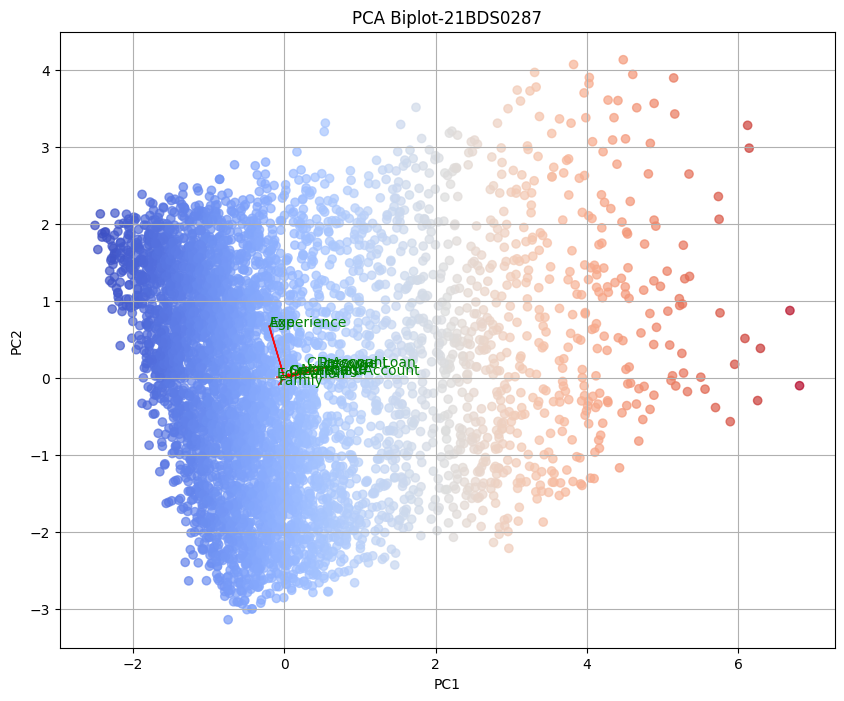

In [5]:
# Biplot Function
def biplot(score, coeff, labels=None, scale=1):
    xs = score[:, 0]
    ys = score[:, 1]

    # Create a figure for the biplot
    plt.figure(figsize=(10, 8))

    # Use a color map to differentiate points
    plt.scatter(xs, ys, alpha=0.7, c=xs, cmap='coolwarm')  # Color points based on PC1 values

    # Add arrows for the components
    for i in range(len(coeff)):
        plt.arrow(0, 0, coeff[i, 0] * scale, coeff[i, 1] * scale, color='r', alpha=0.7)

        # Add labels for the arrows (variables)
        if labels is None:
            plt.text(coeff[i, 0] * scale, coeff[i, 1] * scale, "Var" + str(i + 1), color='g')
        else:
            plt.text(coeff[i, 0] * scale, coeff[i, 1] * scale, labels[i], color='g')

    # Set axis labels and grid
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid(True)

    # Set the title of the plot
    plt.title('PCA Biplot-21BDS0287')

    # Display the plot
    plt.show()

# Call the biplot function using the first two principal components
biplot(pc_df[['PC1', 'PC2']].values, np.transpose(pca.components_), labels=df_numeric.columns)

**SCREE Plot Optimal Number of Principal Components**

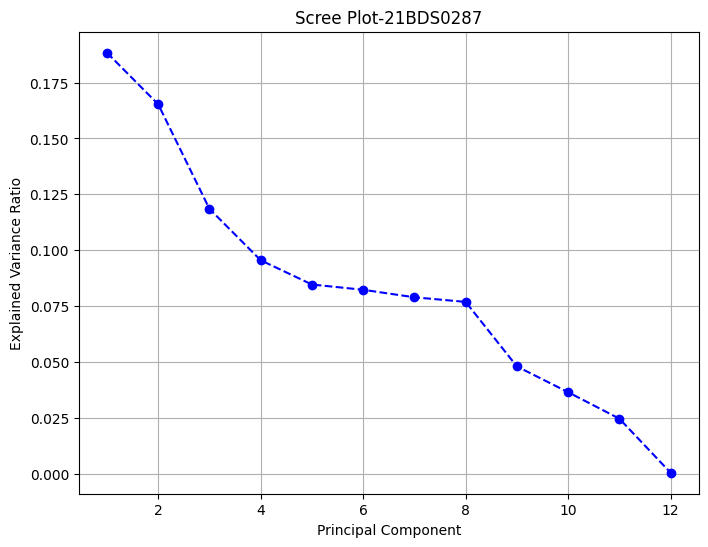

In [6]:
# Scree plot to visualize the explained variance ratio (Eigenvalues)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', color='b')
plt.title('Scree Plot-21BDS0287')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

**Number of Components**

In [7]:
n_comp = 5  # Choose the number of components based on the scree plot
pca = PCA(n_components=n_comp)
data_pca = pca.fit_transform(data_scaled)

# Display the explained variance ratio of the selected components
print(f"Explained variance ratio for the first {n_comp} components: {pca.explained_variance_ratio_}")

Explained variance ratio for the first 5 components: [0.18836602 0.16528828 0.1185068  0.09551364 0.08465562]


**PCA with the Selected Components**

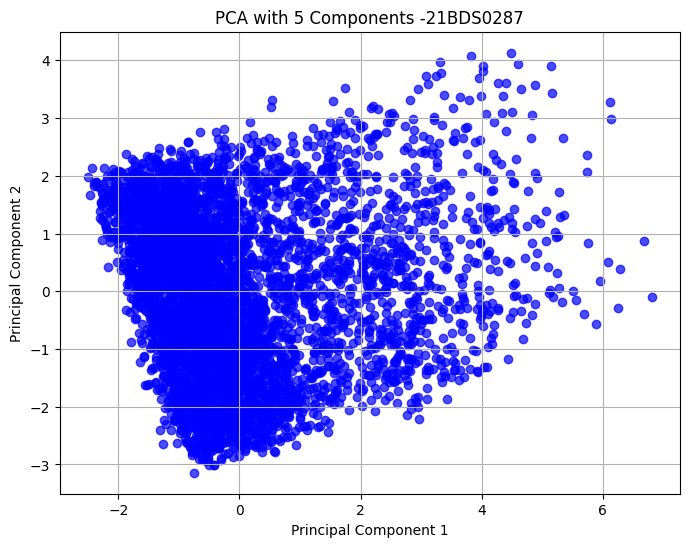

In [8]:
# Perform PCA with the selected number of components
pca = PCA(n_components=n_comp)
data_pca = pca.fit_transform(data_scaled)

# Visualize the transformed data (First two components)
pc_df = pd.DataFrame(data_pca, columns=[f"PC{i+1}" for i in range(n_comp)])

plt.figure(figsize=(8, 6))
plt.scatter(pc_df['PC1'], pc_df['PC2'], alpha=0.7, color='b')
plt.title(f'PCA with {n_comp} Components -21BDS0287')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

**Plotting the PCA Components**

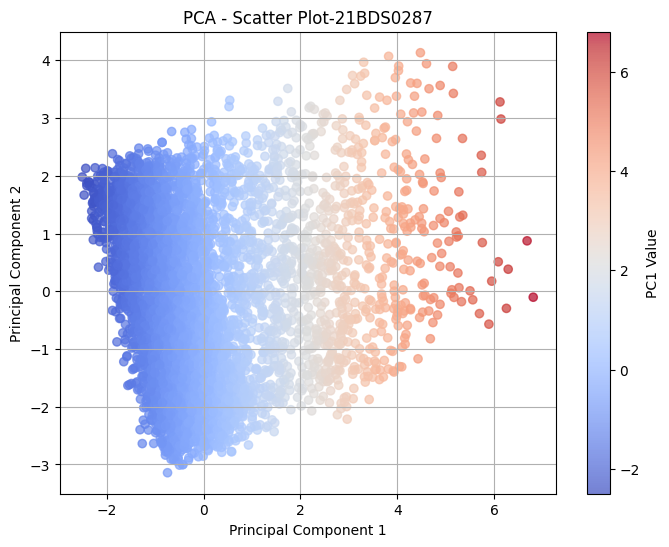

In [9]:
# Step 9: Plot the Selected PCA Components
plt.figure(figsize=(8, 6))

# Use color based on the values of the first principal component (PC1)
plt.scatter(pc_df['PC1'], pc_df['PC2'], alpha=0.7, c=pc_df['PC1'], cmap='coolwarm')

# Add a color bar to indicate the color mapping
plt.colorbar(label='PC1 Value')

# Set plot titles and axis labels
plt.title('PCA - Scatter Plot-21BDS0287')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()

**Interpreting the Results**

Explained Variance Ratio: [0.18836602 0.16528828 0.1185068  0.09551364 0.08465562]
Cumulative Explained Variance: [0.18836602 0.3536543  0.47216111 0.56767475 0.65233036]


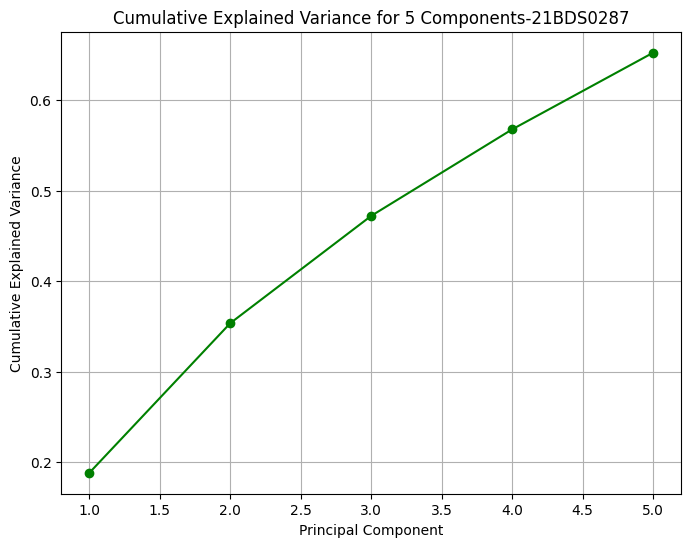

In [10]:
# Explained variance ratio and cumulative explained variance
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative Explained Variance:", cumulative_variance)

# Summary of the PCA results
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='green')
plt.title(f'Cumulative Explained Variance for {n_comp} Components-21BDS0287')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()